In [ ]:
from experimenter import *
import datetime as dt
date_format = "%y%m%d@%H%M"
date_time = dt.datetime.now().strftime(date_format)
dataset_name = "covtype"

plot_results_plotly(dataset_name, repeat=1, verbose=0, save_fig=False, scale=5, fontsize=8, models_per_graph=5, include_legend=False)

Starting


100%|██████████| 295/295 [00:03<00:00, 74.25it/s] 


: 

In [ ]:
dataset_name = "cifar10"

plot_results(dataset_name, repeat=3, verbose=0, save_fig=False, scale=5, fontsize=8, models_per_graph=5)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [14]:
from jeffutils.utils import reimport
from pprint import pprint
import json

from data_loader import *
reimport(["from data_loader import *"], globals())
reimport(["from experimenter import *"], globals())
parent_dir = os.path.dirname(os.path.abspath(os.getcwd()))
sys.path.append(parent_dir)
reimport(["from models.training import *"], globals())

config_path = "config.json"
architecture_path = "architectures.json"


# load settings
with open(config_path) as f:
    settings = json.load(f)
with open(architecture_path) as f:
    architectures = json.load(f)
# benchmark_models = settings["benchmark_models"]
benchmark_models = list(architectures.keys())
benchmark_datasets = settings["benchmark_datasets"]
date_format = settings["date_format"]
repeat = settings["repeat"]
date_time = dt.datetime.now().strftime(date_format)



Working Directory: c:\Users\dalli\source\repos\FoldAndCutNetworks\BenchmarkTests 



In [15]:
test_results = {}
verbose = 2
new_set = False
n_models = 5

if new_set:
    date_time = dt.datetime.now().strftime(date_format)

if verbose > 0:
    print(f"{min(len(benchmark_models), n_models)} models     {benchmark_models} on")
    print(f"{len(benchmark_datasets)} datasets     {benchmark_datasets} at {date_time}\n")
if verbose > 1:
    pprint(settings)

for dataset_name in benchmark_datasets:
    test_results[dataset_name] = {}
    for i, model_name in enumerate(benchmark_models):
        if i >= n_models:
            break
        try:
            results, sizes = test_model(model_name, date_time, dataset_name, 
                                        return_sizes=True, repeat=repeat, verbose=verbose)
            test_results[dataset_name].update(results)
        except (InvalidModelError, KeyError) as e:
            print(f"Error: {e}")
            print(f"Skipping {model_name} on {dataset_name}")
            continue
    constants = (sizes, date_time, dataset_name)
    plot_results(test_results[dataset_name], constants, repeat=repeat,
                 save_fig=True, replace_fig=True, from_data=False, errors='flag')

5 models     ['Control', 'Increasing_SoftFold_depth_1_rate_0.1_stretch_0_lr0.01', 'Flat_SoftFold_depth_1_rate_0.1_stretch_0_lr0.01', 'Increasing_SoftFold_depth_1_rate_0.1_stretch_1_lr0.0001', 'Flat_SoftFold_depth_1_rate_0.1_stretch_1_lr0.0001', 'Increasing_Fold_depth_1_rate_0.1_stretch_1_lr0.01', 'Flat_Fold_depth_1_rate_0.1_stretch_1_lr0.01', 'Increasing_Fold_depth_1_rate_0.1_stretch_0_lr0.001', 'Flat_Fold_depth_1_rate_0.1_stretch_0_lr0.001', 'Increasing_SoftFold_depth_4_rate_0.1_stretch_0_lr0.01', 'Plateau_SoftFold_depth_4_rate_0.1_stretch_0_lr0.01', 'Flat_SoftFold_depth_4_rate_0.1_stretch_0_lr0.01', 'Linear_Increasing_SoftFold_depth_4_rate_0.1_stretch_0_lr0.01_alternate_1_0', 'Linear_Increasing_SoftFold_depth_4_rate_0.1_stretch_0_lr0.01_alternate_1_1', 'Linear_Plateau_SoftFold_depth_4_rate_0.1_stretch_0_lr0.01_alternate_1_0', 'Linear_Plateau_SoftFold_depth_4_rate_0.1_stretch_0_lr0.01_alternate_1_1', 'Linear_Flat_SoftFold_depth_4_rate_0.1_stretch_0_lr0.01_alternate_1_0', 'Linear_Flat_

Training: Epoch:75/75, Loss:0.0033: 100%|██████████| 75/75 [00:02<00:00, 37.47it/s]


FileNotFoundError: [Errno 2] No such file or directory: 'results/digits/Increasing_SoftFold_depth_1_rate_0.1_stretch_0_lr0.01/npy_files/train_loss_i0_d250109@0935.npy'

100%|██████████| 5/5 [00:01<00:00,  3.84it/s]


Saving your figure...


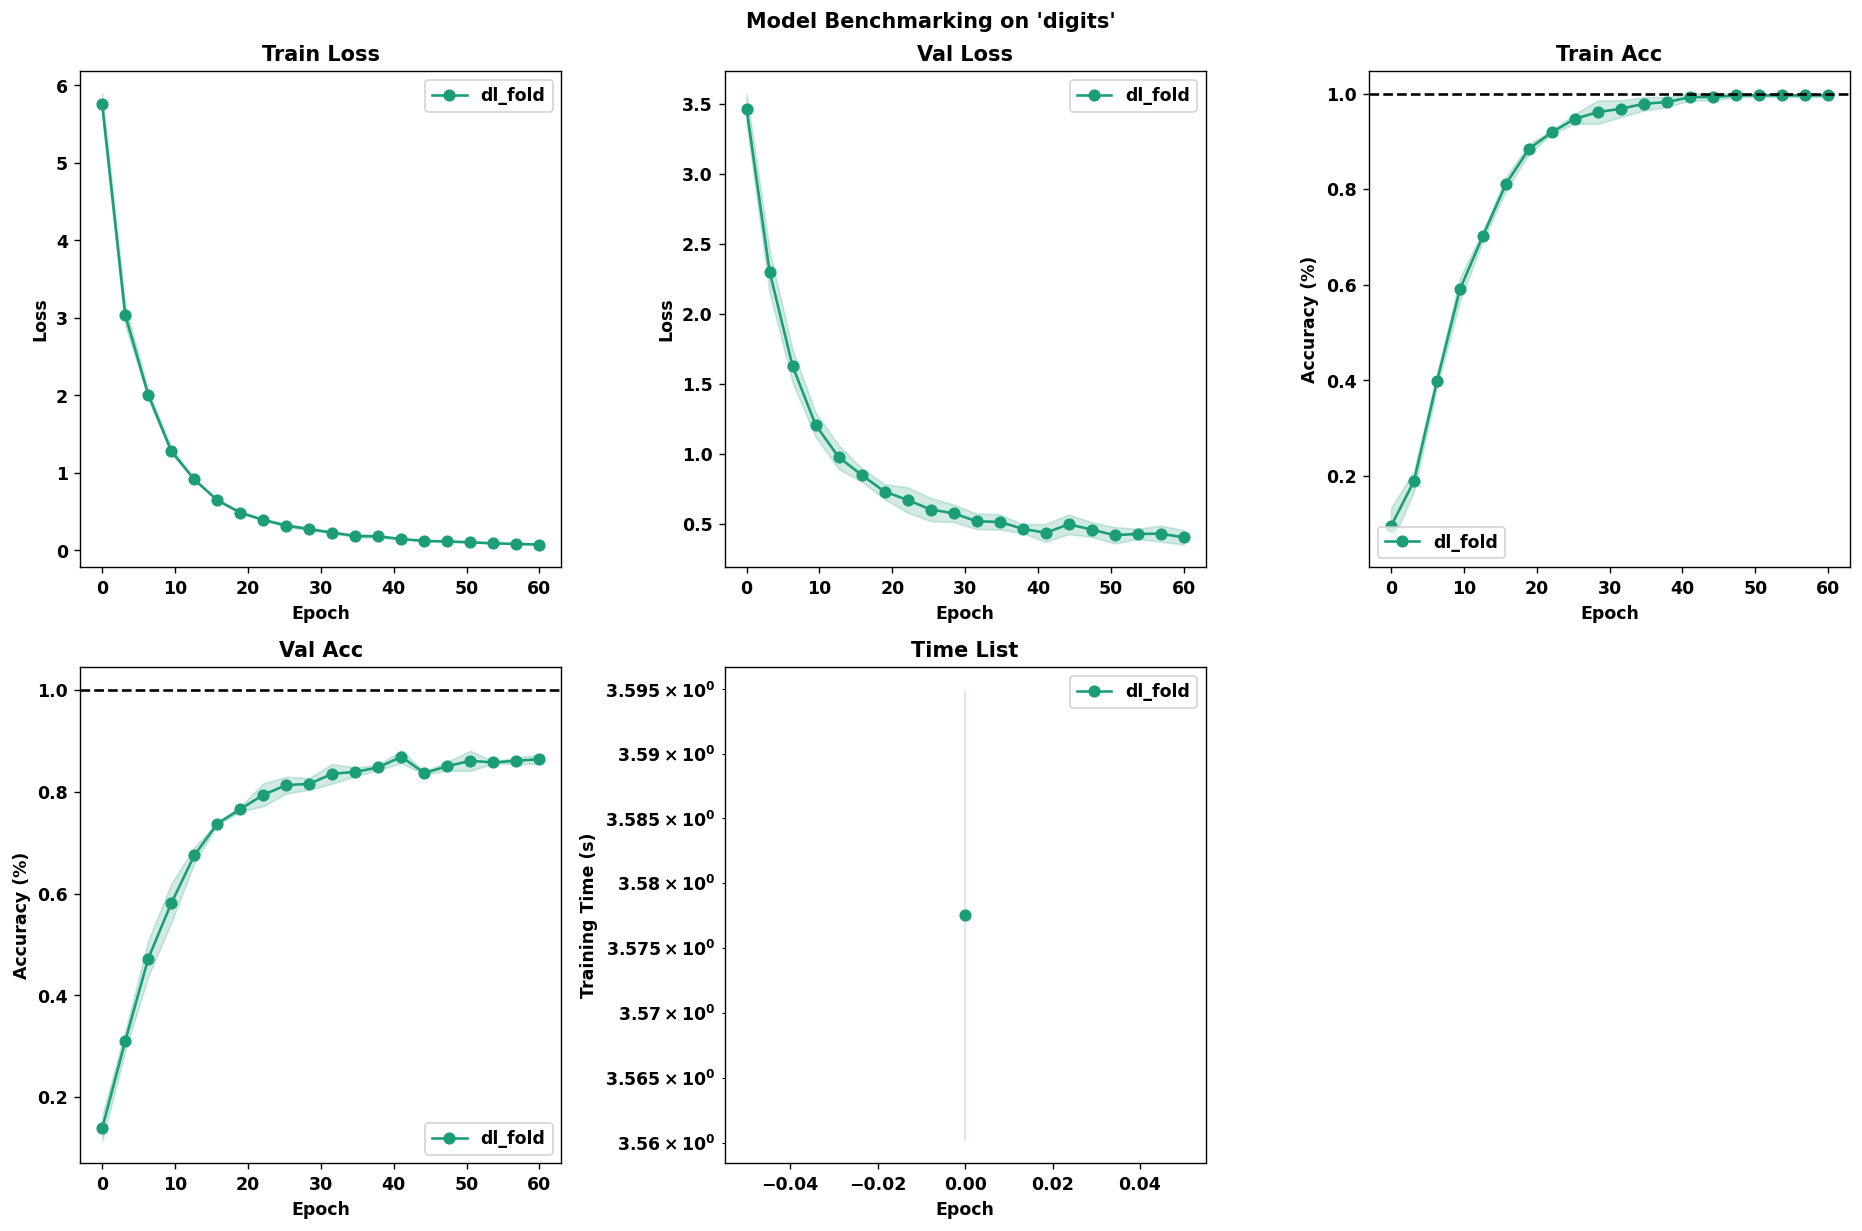

In [ ]:
reimport(["from experimenter import *"], globals())
plot_results(test_results[dataset_name], constants, repeat=repeat,
                 save_fig=True, replace_fig=True, from_data=False, errors='flag', rows=2, verbose=1)

In [ ]:
import argparse

def main():
    import csv
    parser = argparse.ArgumentParser(description='Print a Monster registry report')
    parser.add_argument("filename", type=str)
    parser.add_argument("name", type=str)
    args = parser.parse_args()

    # read the data from the csv file into a list of column names and a list of rows of data
    columns = []
    data = []
    monster_name = "MonsterName"
    filename = "unit_cases/basic.csv"
    # 
    # filename = args.filename

    with open(filename, 'r') as file:
        my_reader = csv.reader(file, delimiter=',')
        for i, monster in enumerate(my_reader):
            if i == 0:
                columns = monster
            else:
                data.append(monster)
                
    # get the monster name from the data where the lowercase version of the name matches the lowercase version of the input name

    
    
    def remove_duplicates(monster_names:list) -> list:
        """
        This helper function removes duplicate monster names from a list
        Parameters:
            monster_names (list): the list of monster names to remove duplicates from
        Returns:
            result (list): the list of monster names with duplicates removed
        """
        # check input
        assert type(monster_names) == list, f"'monster_names' must be a list"
        
        # remove duplicates
        seen = set()
        result = []
        for name in monster_names:
            if name not in seen:
                seen.add(name)
                result.append(name)
        return result
    
    
    def get_other_mons(column_id:int, get_str_ag:bool=True, verbose:bool=True) -> tuple:
        """
        This helper function returns a list of the monsters weak to or strong against
        the requested monster
        Parameters:
            column_id (int): the column index to check the data for
                        'Types' indiciates we are checking for 'Strong against'
                        'Weaknesses' indicates we are checking for 'Weak against'
            get_str_ag (bool): default is True.
                        True indiecates we are checking for 'Strong against'
                        False indicates we are checking for 'Weak against'
            verbose (bool): default is True.
                        True to print the result, False to return the result
        Returns:
            against_names (tuple): optionally returns the list of monster names
        """
        # check input
        assert type(idx_monster) == int, f"'idx_monster' must be an integer"
        assert type(column_id) == int, f"'column' must be an integer"
        assert type(data) == list, f"'data' must be a list"

        # get all monster names and IDs that are weak to/strong against the monster
        against_ids = []
        against_names = []
        id_list = monsters_weak2id if get_str_ag else monsters_type_id
        name_list = monsters_weak2name if get_str_ag else monsters_type_name
        for mtype in data[idx_monster][column_id].split(","):
            against_ids += id_list.get(mtype, [])
            against_names += name_list.get(mtype, [])
        
        # sort monster names by monster IDs
        if len(against_ids) > 0:
            against_ids = remove_duplicates(against_ids)
            against_names = remove_duplicates(against_names)
            paired_monster_list = list(zip(map(int, against_ids), against_names))
            paired_monster_list.sort()
            against_ids, against_names = zip(*paired_monster_list)

        # print or return the sorted tuple of monsters
        if verbose:
            if len(against_names) == 0:
                print("    None")
            for other_mon in against_names:
                print(f"    {other_mon}")
        else:
            return against_names
    
    
    def get_evolution(monster_id:str, path:list=None) -> None:
        """
        This helper function finds and prints the evolution path of a monster
        Parameters:
            monster_id (str): the ID of the monster to find the evolution path for
            path (list): default is None.
                        The list of monster IDs that have been traversed to get to the current monster
        """
        # check input
        assert type(monster_id) == str, f"'monster_id' must be a string"
        assert type(path) == list or path is None, f"'path' must be a list"
        
        # initialize path
        if path is None:
            path = [monster_id]
        
        # base case prints the evolution path and finishes
        if monster_id not in evo_map or not evo_map[monster_id]:
            print(f"    {' > '.join([id2name[mid]['name'] for mid in path])}")
            return
        
        # recursive case finds the next evolution in the path
        for evo_id in evo_map[monster_id]:
            get_evolution(evo_id, path + [evo_id])
    
    
    # create a dictionary to map the desired column to its index in the data
    imap = {col: i for i, col in enumerate(columns)}
    id_idx = imap["ID"]
    name_idx = imap["Name"]
    type_idx = imap["Types"]
    weak_idx = imap["Weaknesses"]
    evo_idx = imap["Evolution"]
    
    monster_name = args.name.lower()
    for monster in data:
        if monster[name_idx].lower() == monster_name:
            monster_name = monster[name_idx]
            break

    # initialize dictionaries to map relevant monster data for quick look up
    id2name = {}                # maps a monster ID to its name and index in the data
    name2id = {}                # maps a monster name to its ID and index in the data
    monsters_weak2id = {}       # maps a type to a list of monster IDs weak to that type
    monsters_weak2name = {}     # maps a type to a list of monster names weak to that type
    monsters_type_id = {}       # maps a type to a list of monster IDs with that type
    monsters_type_name = {}     # maps a type to a list of monster names with that type
    evo_map = {}                # maps a monster ID to a list of monster IDs it evolves into
    for i, monster in enumerate(data):
        id2name[monster[id_idx]] = {"name":monster[name_idx].lower(), "index": i} 
        name2id[monster[name_idx]] = {"id":monster[id_idx], "index": i}
        
        # create look up dictionaries for monster weaknesses
        for weakness in monster[weak_idx].split(","):
            monsters_weak2id.setdefault(weakness, []).append(monster[id_idx]), 
            monsters_weak2name.setdefault(weakness, []).append(monster[name_idx])
        
        # create look up dictionaries for monster types
        for typing in monster[type_idx].split(","):
            monsters_type_id.setdefault(typing, []).append(monster[id_idx]), 
            monsters_type_name.setdefault(typing, []).append(monster[name_idx])
        
        # create a dictionary to allow us to trace the path of a monster's evolution
        evolutions = monster[evo_idx].split(",")
        evo_map[monster[id_idx]] = evolutions if evolutions != [""] else []


    # get ID
    monster_info = name2id[monster_name]
    monster_id = monster_info["id"]
    idx_monster = monster_info["index"]
    print("ID:")
    print(f"    {monster_id}")

    # get Strong against
    print("Strong against:")
    get_other_mons(imap["Types"])

    # get Weak against
    print("Weak against:")
    get_other_mons(imap["Weaknesses"], get_str_ag=False)

    # get Evolution
    print("Evolution:")
    if len(evo_map.get(monster_id, [])) == 0:
        print(f"    {monster_name}")
    else:
        get_evolution(monster_id)
            
main()


ID:
    001
Strong against:
    None
Weak against:
    None
Evolution:
    None
